In [31]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DhvanibenJasoliya\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
pip install utils

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import utils

In [22]:
df = pd.read_csv('travel/top_travel_vid.csv')

In [33]:
import nltk

# Download the 'punkt' resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DhvanibenJasoliya\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [35]:
# # Remove special characters from video titles
# df['cleaned_titles'] = df['title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
# df['tokenized_titles'] = df['cleaned_titles'].apply(lambda x: [word for word in word_tokenize(x.lower()) if len(word) > 3])

# # Tokenize the cleaned video titles
# df['tokenized_titles'] = df['cleaned_titles'].apply(lambda x: word_tokenize(x.lower()))

# # Calculate word frequency distribution
# all_words = [word for tokens in df['tokenized_titles'] for word in tokens]
# fdist = FreqDist(all_words)

# # Plot a bar chart of the most common words
# plt.figure(figsize=(10, 6))
# fdist.plot(30, cumulative=False)
# plt.show()

# # Generate a WordCloud
# wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate_from_frequencies(fdist)
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Cleaned Video Titles')
# plt.show()

In [36]:
df.shape

(6298, 15)

In [37]:
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DhvanibenJasoliya\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


True

Sample Tokenized Titles:
['2023', 'rewind', 'amazing', 'places', 'planet', '2023', 'review']
['havasupai', 'arizona']
['kjerag', 'hike', 'kjeragbolten', 'norway', 'amazing', 'places']
['bryce', 'canyon', 'snow', 'utah']
['krakow', 'poland', 'amazing', 'places']

Sample Cleaned Titles:
2023 Rewind Amazing Places on Our Planet 2023 in Review
Havasupai Arizona USA
Kjerag Hike and Kjeragbolten Norway  Amazing Places 4K
Bryce Canyon in the Snow Utah
Krakow Poland  Amazing Places 4K


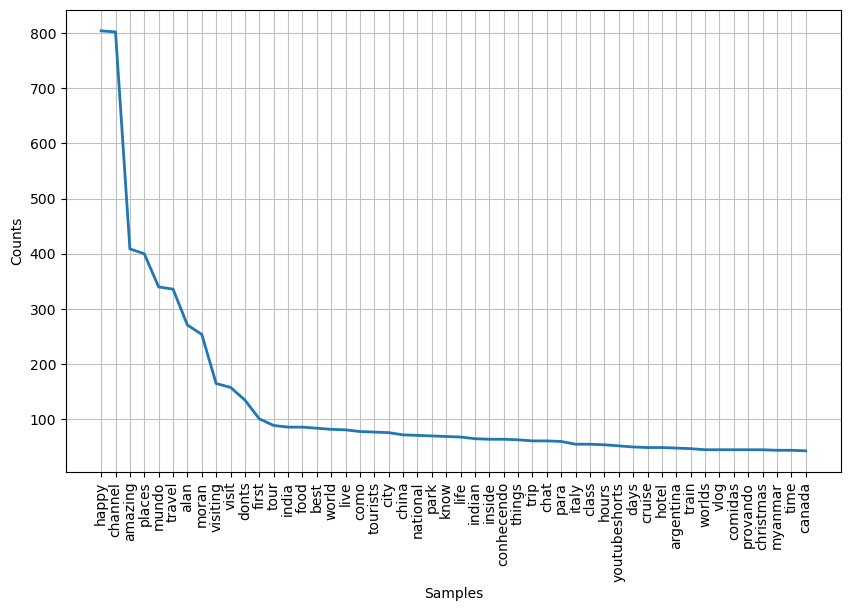

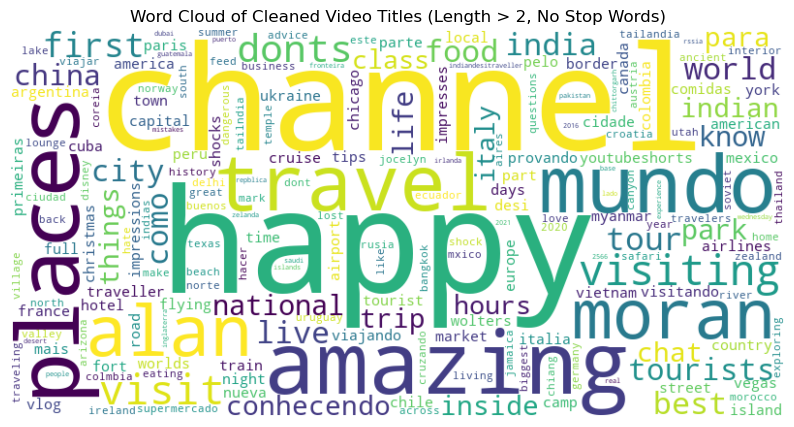

In [38]:
stop_words = set(stopwords.words('english'))
df['cleaned_titles'] = df['title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
df['tokenized_titles'] = df['cleaned_titles'].apply(lambda x: [word for word in word_tokenize(x.lower()) if len(word) > 3 and word not in stop_words])

# Calculate word frequency distribution
all_words = [word for tokens in df['tokenized_titles'] for word in tokens]
fdist = FreqDist(all_words)


# Print a sample of tokenized titles
print("Sample Tokenized Titles:")
for i in range(5):  # Print the first 5 titles as a sample
    print(df['tokenized_titles'][i])

# Print a sample of cleaned titles
print("\nSample Cleaned Titles:")
for i in range(5):  # Print the first 5 titles as a sample
    print(df['cleaned_titles'][i])
    
    
# Plot a bar chart of the most common words
plt.figure(figsize=(10, 6))
fdist.plot(50, cumulative=False)
plt.show()

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=150, background_color='white').generate_from_frequencies(fdist)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Video Titles (Length > 2, No Stop Words)')
plt.show()

In [39]:
from gensim import corpora, models

# Example: Topic Modeling with LDA
dictionary = corpora.Dictionary(df['tokenized_titles'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokenized_titles']]
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print topics
for topic in lda_model.print_topics():
    print(topic)

(0, '0.114*"visit" + 0.031*"things" + 0.027*"places" + 0.026*"amazing" + 0.023*"tourists" + 0.022*"know" + 0.014*"shock" + 0.012*"italy" + 0.011*"france" + 0.010*"normandy"')
(1, '0.074*"visiting" + 0.056*"donts" + 0.032*"world" + 0.024*"moran" + 0.014*"shocks" + 0.011*"chicago" + 0.009*"must" + 0.009*"orleans" + 0.009*"wolters" + 0.008*"live"')
(2, '0.116*"travel" + 0.030*"chat" + 0.025*"wolters" + 0.024*"jocelyn" + 0.023*"mark" + 0.020*"live" + 0.018*"christmas" + 0.013*"england" + 0.011*"questions" + 0.010*"time"')
(3, '0.019*"food" + 0.018*"love" + 0.017*"travelers" + 0.013*"first" + 0.011*"ireland" + 0.010*"texas" + 0.010*"fellow" + 0.010*"thank" + 0.009*"airport" + 0.008*"trip"')
(4, '0.105*"channel" + 0.103*"happy" + 0.033*"mundo" + 0.027*"alan" + 0.020*"best" + 0.014*"advice" + 0.011*"tour" + 0.009*"paris" + 0.008*"life" + 0.007*"city"')


In [40]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy  # Add this import statement

# Download spaCy English language model
try:
    from spacy.cli import download
    download('en_core_web_sm')
except OSError:
    print("Model 'en_core_web_sm' already installed.")

# Remove special characters from video titles, filter out short words, and remove stop words
stop_words = set(stopwords.words('english'))
df['cleaned_titles'] = df['title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
df['tokenized_titles'] = df['cleaned_titles'].apply(lambda x: [word for word in word_tokenize(x.lower()) if len(word) > 2 and word not in stop_words])

# Calculate word frequency distribution
all_words = [word for tokens in df['tokenized_titles'] for word in tokens]
fdist = FreqDist(all_words)

# Print a sample of tokenized titles
print("Sample Tokenized Titles:")
for i in range(5):  # Print the first 5 titles as a sample
    print(df['tokenized_titles'][i])

# Print a sample of cleaned titles
print("\nSample Cleaned Titles:")
for i in range(5):  # Print the first 5 titles as a sample
    print(df['cleaned_titles'][i])
    
from gensim import corpora, models

# Example: Topic Modeling with LDA
dictionary = corpora.Dictionary(df['tokenized_titles'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokenized_titles']]
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print topics
for topic in lda_model.print_topics():
    print(topic)

# Plot a bar chart of the most common words
plt.figure(figsize=(10, 6))
fdist.plot(50, cumulative=False)
plt.show()

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=150, background_color='white').generate_from_frequencies(fdist)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Video Titles')
plt.show()


ModuleNotFoundError: No module named 'spacy'

In [41]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DhvanibenJasoliya\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [42]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

df['pos_tags'] = df['tokenized_titles'].apply(lambda x: pos_tag(x))
print(df[['title', 'pos_tags']])

                                                  title  \
0     2023 Rewind: Amazing Places on Our Planet (202...   
1                               Havasupai, Arizona, USA   
2     Kjerag Hike and Kjeragbolten, Norway  [Amazing...   
3                        Bryce Canyon in the Snow, Utah   
4                   Krakow, Poland  [Amazing Places 4K]   
...                                                 ...   
6293  Eat New Orleans - 5 Foods You Have to Eat in N...   
6294  Visit Loire Valley - 5 Things to Love & Hate a...   
6295  Visit Krakow - 10 Things That Will SHOCK You A...   
6296    US Hotels: Where to Stay When You Visit America   
6297   Visit Turku - What to See & Do in Turku, Finland   

                                               pos_tags  
0     [(2023, CD), (rewind, NN), (amazing, JJ), (pla...  
1                      [(havasupai, NN), (arizona, NN)]  
2     [(kjerag, NN), (hike, NN), (kjeragbolten, VB),...  
3     [(bryce, NN), (canyon, NN), (snow, VBP), (utah...  
4

In [43]:
pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 445.2 kB/s eta 0:00:02
     --- --------------------------------- 61.4/636.8 kB 469.7 kB/s eta 0:00:02
     ---- -------------------------------- 71.7/636.8 kB 438.9 kB/s eta 0:00:02
     ----- ------------------------------- 92.2/636.8 kB 438.1 kB/s eta 0:00:02
     ------ ----------------------------- 122.9/636.8 kB 481.4 kB/s eta 0:00:02
     -------- --------------------------- 143.4/636.8 kB 502.3 kB/s eta 0:00:01
     -------- --------------------------- 153.6/636.8 kB 484.3 kB/s eta 0:00:01
     ---------- ------------------------- 194.6/636.8 kB 491.5 kB/s eta 0:00:01
     ----------- ------------------------ 204.8/636.8 kB 479.2 kB/s eta 0:00:01
     ------------ ----------------------- 225.3/636.8 kB 510.8 kB/s eta 0:00:01
     -------------- --------------------- 256.0/636.8

In [44]:
# Assuming you have a sentiment analysis library like TextBlob installed
from textblob import TextBlob

df['sentiment'] = df['tokenized_titles'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
print(df[['title', 'sentiment']])


                                                  title  sentiment
0     2023 Rewind: Amazing Places on Our Planet (202...       0.60
1                               Havasupai, Arizona, USA       0.00
2     Kjerag Hike and Kjeragbolten, Norway  [Amazing...       0.60
3                        Bryce Canyon in the Snow, Utah       0.00
4                   Krakow, Poland  [Amazing Places 4K]       0.60
...                                                 ...        ...
6293  Eat New Orleans - 5 Foods You Have to Eat in N...       0.00
6294  Visit Loire Valley - 5 Things to Love & Hate a...      -0.15
6295  Visit Krakow - 10 Things That Will SHOCK You A...       0.00
6296    US Hotels: Where to Stay When You Visit America       0.00
6297   Visit Turku - What to See & Do in Turku, Finland       0.00

[6298 rows x 2 columns]


In [45]:
# Identify popular topics and keywords that resonate with the audience.
top_keywords = fdist.most_common(10)
print("Top Keywords:", top_keywords)

# Understand the overall sentiment of the titles and focus on creating content with a positive sentiment.
average_sentiment = df['sentiment'].mean()
print("Average Sentiment:", average_sentiment)

# Analyze the distribution of text lengths and consider diversifying content lengths to cater to different preferences.
text_lengths = df['tokenized_titles'].apply(len)
print("Mean Text Length:", text_lengths.mean())


Top Keywords: [('happy', 804), ('channel', 802), ('amazing', 409), ('places', 400), ('mundo', 340), ('travel', 336), ('alan', 271), ('moran', 254), ('visiting', 165), ('visit', 158)]
Average Sentiment: 0.16073396201730591
Mean Text Length: 3.9185455700222294


In [46]:
from nltk import FreqDist
from nltk import bigrams

# Assuming df is your DataFrame with a 'tokenized_titles' column
all_bigrams = [bigram for tokens in df['tokenized_titles'] for bigram in bigrams(tokens)]
bigram_freq = FreqDist(all_bigrams)

# Print or visualize the results
print(bigram_freq.most_common(10))

[(('happy', 'channel'), 794), (('amazing', 'places'), 391), (('alan', 'mundo'), 269), (('donts', 'visiting'), 95), (('national', 'park'), 57), (('travel', 'chat'), 51), (('provando', 'comidas'), 39), (('indian', 'desi'), 38), (('desi', 'traveller'), 38), (('know', 'visit'), 33)]


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming df is your DataFrame with a 'tokenized_titles' column
tokenized_titles = [' '.join(tokens) for tokens in df['tokenized_titles']]

# Convert tokenized titles to a document-term matrix
vectorizer = CountVectorizer(max_df=0.85, max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(tokenized_titles)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust the number of topics as needed
lda_topic_matrix = lda_model.fit_transform(dtm)

# Print or visualize the results
lda_topic_matrix

array([[0.6503497 , 0.02523808, 0.02500086, 0.27433975, 0.02507161],
       [0.10000122, 0.10000114, 0.10000099, 0.59999536, 0.10000129],
       [0.83999856, 0.04000037, 0.04000033, 0.04000032, 0.04000042],
       ...,
       [0.02857165, 0.02857172, 0.88545932, 0.02857168, 0.02882563],
       [0.04000067, 0.43984842, 0.20306644, 0.04000076, 0.27708371],
       [0.06666694, 0.06666704, 0.73319184, 0.06666698, 0.06680721]])

In [48]:
# Assuming lda_topic_matrix is your LDA topic matrix
df['dominant_topic'] = lda_topic_matrix.argmax(axis=1) + 1  # Adding 1 to make topics start from 1

# Print or visualize the results
print(df[['title', 'dominant_topic']])


                                                  title  dominant_topic
0     2023 Rewind: Amazing Places on Our Planet (202...               1
1                               Havasupai, Arizona, USA               4
2     Kjerag Hike and Kjeragbolten, Norway  [Amazing...               1
3                        Bryce Canyon in the Snow, Utah               1
4                   Krakow, Poland  [Amazing Places 4K]               1
...                                                 ...             ...
6293  Eat New Orleans - 5 Foods You Have to Eat in N...               3
6294  Visit Loire Valley - 5 Things to Love & Hate a...               5
6295  Visit Krakow - 10 Things That Will SHOCK You A...               3
6296    US Hotels: Where to Stay When You Visit America               2
6297   Visit Turku - What to See & Do in Turku, Finland               3

[6298 rows x 2 columns]


In [49]:
# Assuming vectorizer is the CountVectorizer used for LDA
feature_names = vectorizer.get_feature_names_out()

# Print the top keywords for each topic
n_top_keywords = 10
for i, topic in enumerate(lda_model.components_):
    top_keywords_idx = topic.argsort()[:-n_top_keywords-1:-1]
    top_keywords = [feature_names[idx] for idx in top_keywords_idx]
    print(f'Topic {i+1}: {top_keywords}')


Topic 1: ['amazing', 'places', 'travel', 'live', 'national', 'park', 'indian', 'chat', 'time', 'trip']
Topic 2: ['conhecendo', 'travel', 'para', 'youtubeshorts', 'argentina', 'china', 'city', 'christmas', 'viajando', 'cidade']
Topic 3: ['moran', 'visiting', 'visit', 'donts', 'tour', 'india', 'food', 'know', 'things', 'world']
Topic 4: ['happy', 'channel', 'mundo', 'alan', 'parte', 'vietnam', 'wolters', 'colombia', 'mark', 'jocelyn']
Topic 5: ['como', 'tourists', 'provando', 'comidas', 'york', 'tourist', 'life', 'america', 'hotel', 'american']


C:\Users\DhvanibenJasoliya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


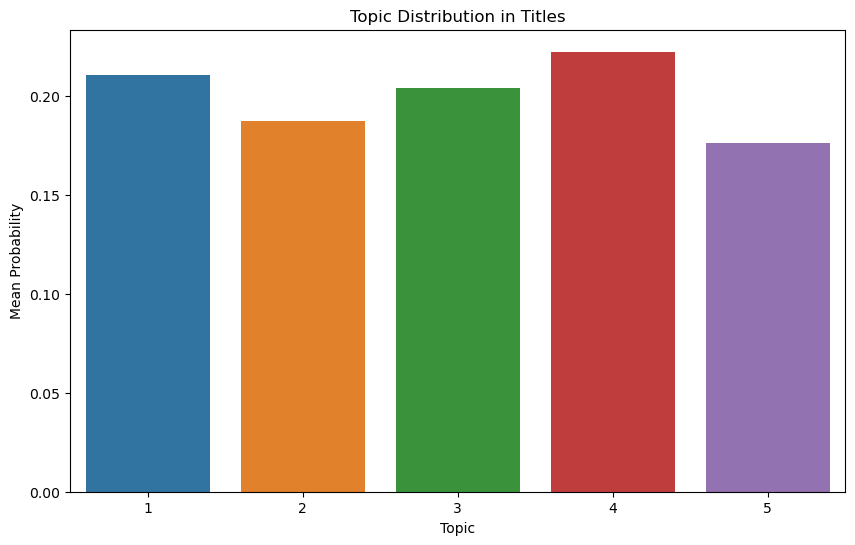

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming lda_topic_matrix is your LDA topic matrix
topic_distribution = lda_topic_matrix.mean(axis=0)

# Plot the distribution of topics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(topic_distribution)+1)), y=topic_distribution)
plt.title('Topic Distribution in Titles')
plt.xlabel('Topic')
plt.ylabel('Mean Probability')
plt.show()

In [51]:
# Assuming vectorizer is your CountVectorizer used for LDA
feature_names = vectorizer.get_feature_names_out()

# Print top keywords for each topic
n_top_keywords = 10
for topic_idx, topic in enumerate(lda_model.components_):
    top_keywords_idx = topic.argsort()[:-n_top_keywords - 1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_keywords)}")


Topic 1: amazing, places, travel, live, national, park, indian, chat, time, trip
Topic 2: conhecendo, travel, para, youtubeshorts, argentina, china, city, christmas, viajando, cidade
Topic 3: moran, visiting, visit, donts, tour, india, food, know, things, world
Topic 4: happy, channel, mundo, alan, parte, vietnam, wolters, colombia, mark, jocelyn
Topic 5: como, tourists, provando, comidas, york, tourist, life, america, hotel, american


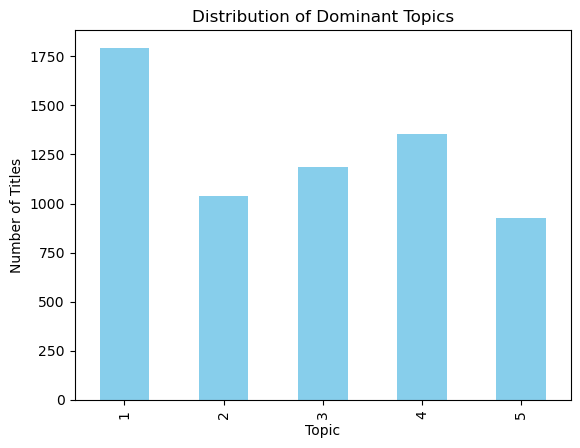

In [52]:
import matplotlib.pyplot as plt

topic_distribution = df['dominant_topic'].value_counts().sort_index()
topic_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Dominant Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Titles')
plt.show()

In [53]:
# Assuming df is your DataFrame
for topic_idx in range(1, lda_model.n_components + 1):
    topic_titles = df[df['dominant_topic'] == topic_idx]['title'].tolist()
    print(f"\nTitles for Dominant Topic {topic_idx}:\n")
    for title in topic_titles:
        print(title)



Titles for Dominant Topic 1:

2023 Rewind: Amazing Places on Our Planet (2023 in Review)
Kjerag Hike and Kjeragbolten, Norway  [Amazing Places 4K]
Bryce Canyon in the Snow, Utah
Krakow, Poland  [Amazing Places 4K]
Besseggen Ridge, Norway  [Amazing Places 4K]
Tre Cime di Lavaredo, The Dolomites, Italy
Havasu Falls and Canyon: Havasupai Indian Reservation, Arizona, USA  [Amazing Places 4K]
Borobudur, Indonesia
Maya Ruins of Yaxchilán & Bonampak and the Lacandon Jungle, Chiapas, Mexico  [Amazing Places 4K]
Canyonlands, Utah from the White Rim Road
Lofoten, Norway: The World’s Most Beautiful Islands?  [Amazing Places 4K]
Hiking to Trolltunga, Norway  [Amazing Places 4K]
Ribbon Falls, Grand Canyon, Arizona
Lower Antelope Canyon, Arizona
Great Stupa at Sanchi, India  [Amazing Places 4K]
Roman Ruins in Algeria: Timgad, Djémila, Tiddis, Tipasa, Cherchell  [Amazing Places 4K]
Hallstatt, Austria
Perito Moreno Glacier, Argentina  [Amazing Places 4K]
Canyon de Chelly, Arizona
Shiraz, Iran  [Amazi

Mean Title Length (Characters): 47.71149571292474
Median Title Length (Characters): 46.0
Minimum Title Length (Characters): 8
Maximum Title Length (Characters): 100


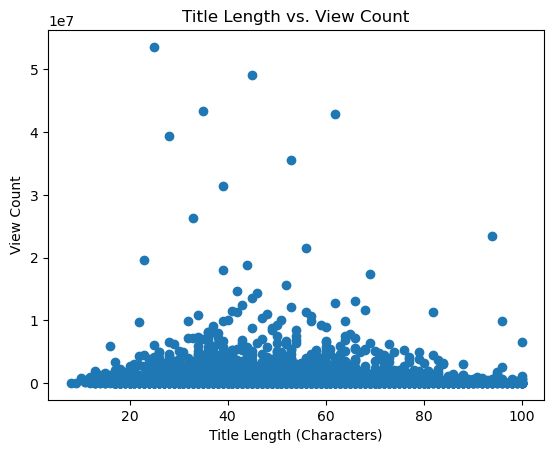

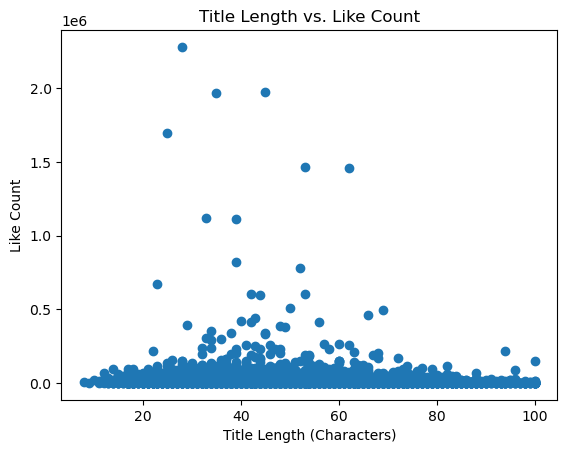

Correlation between Title Length and View Count: -0.023599904634208062
Correlation between Title Length and Like Count: -0.054211607976176454


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'title', 'viewcount', and 'likecount' are the column names in your DataFrame
# Calculate title length in characters
df['title_length_characters'] = df['title'].apply(len)

# Descriptive statistics for title length
print("Mean Title Length (Characters):", df['title_length_characters'].mean())
print("Median Title Length (Characters):", df['title_length_characters'].median())
print("Minimum Title Length (Characters):", df['title_length_characters'].min())
print("Maximum Title Length (Characters):", df['title_length_characters'].max())

# Scatter plot: Title length vs. View count
plt.scatter(df['title_length_characters'], df['viewCount'])
plt.title('Title Length vs. View Count')
plt.xlabel('Title Length (Characters)')
plt.ylabel('View Count')
plt.show()

# Scatter plot: Title length vs. Like count
plt.scatter(df['title_length_characters'], df['likeCount'])
plt.title('Title Length vs. Like Count')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Like Count')
plt.show()

# Correlation analysis between title length, view count, and like count
correlation_viewcount = df['title_length_characters'].corr(df['viewCount'])
correlation_likecount = df['title_length_characters'].corr(df['likeCount'])

print("Correlation between Title Length and View Count:", correlation_viewcount)
print("Correlation between Title Length and Like Count:", correlation_likecount)


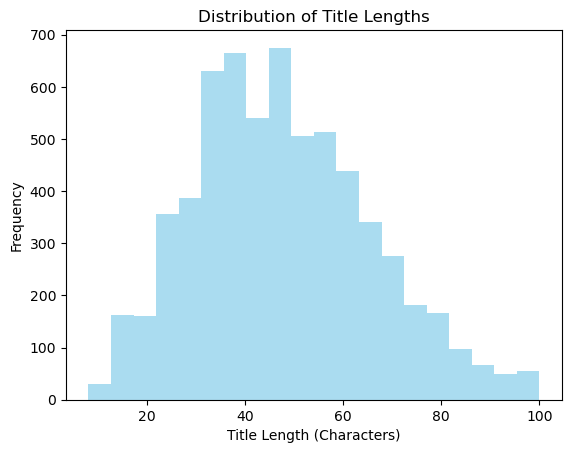

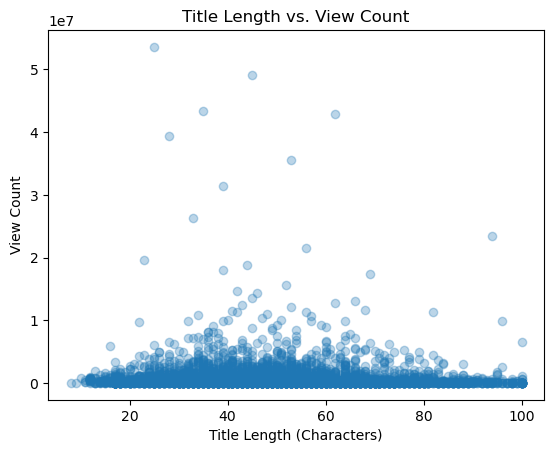

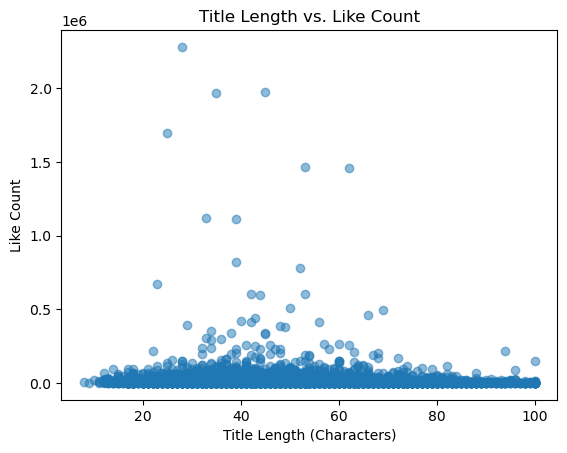

In [55]:
# Histogram: Title length distribution
plt.hist(df['title_length_characters'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: Title length vs. View count
plt.scatter(df['title_length_characters'], df['viewCount'], alpha=0.3)
plt.title('Title Length vs. View Count')
plt.xlabel('Title Length (Characters)')
plt.ylabel('View Count')
plt.show()

# Scatter plot: Title length vs. Like count
plt.scatter(df['title_length_characters'], df['likeCount'], alpha=0.5)
plt.title('Title Length vs. Like Count')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Like Count')
plt.show()

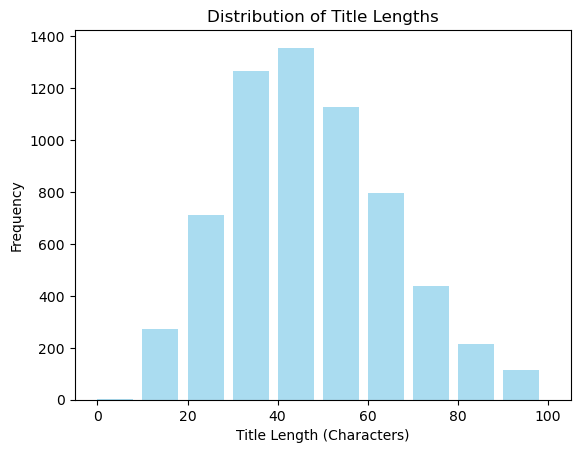

In [56]:
# Define intervals and width for the histogram
interval_bins = range(0, max(df['title_length_characters']) + 10, 10)
bar_width = 8  # Adjust the width as needed

# Histogram: Title length distribution with intervals and space between bars
plt.hist(df['title_length_characters'], bins=interval_bins, color='skyblue', alpha=0.7, width=bar_width)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Frequency')
plt.show()

1420
495
4383


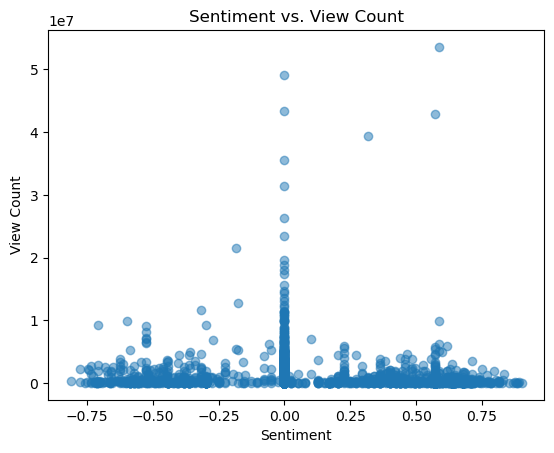

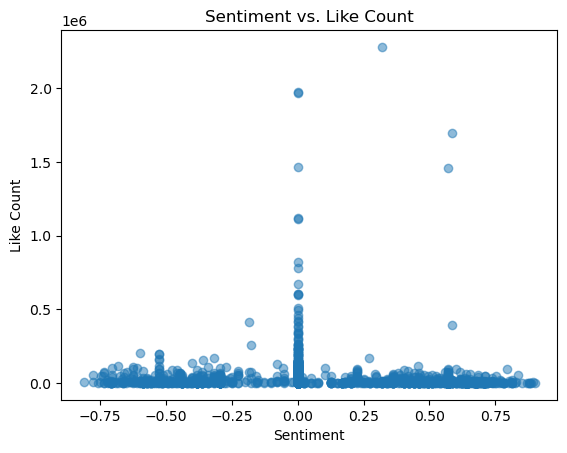

In [57]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'title', 'viewcount', 'likecount'
df['title'] = df['title'].astype(str)

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each title and create a new column
df['sentiment'] = df['title'].apply(lambda title: sid.polarity_scores(title)['compound'])

df['sentiment_category'] = df['sentiment'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

# Count the number of titles in each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

print(sentiment_counts['positive'])
print(sentiment_counts['negative'])
print(sentiment_counts['neutral'])

# Scatter plot: Sentiment vs. View count
plt.scatter(df['sentiment'], df['viewCount'], alpha=0.5)
plt.title('Sentiment vs. View Count')
plt.xlabel('Sentiment')
plt.ylabel('View Count')
plt.show()

# Scatter plot: Sentiment vs. Like count
plt.scatter(df['sentiment'], df['likeCount'], alpha=0.5)
plt.title('Sentiment vs. Like Count')
plt.xlabel('Sentiment')
plt.ylabel('Like Count')
plt.show()


In [58]:
pip install textstat

     ---------------------------------------- 0.0/105.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/105.1 kB ? eta -:--:--
     ---------- -------------------------- 30.7/105.1 kB 640.0 kB/s eta 0:00:01
     --------------------- --------------- 61.4/105.1 kB 465.5 kB/s eta 0:00:01
     ------------------------- ----------- 71.7/105.1 kB 435.7 kB/s eta 0:00:01
     -----------------------------------  102.4/105.1 kB 535.8 kB/s eta 0:00:01
     ------------------------------------ 105.1/105.1 kB 467.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
      --------------------------------------- 0.0/2.0 MB 660.6 kB/s eta 0:00:03
      --------------------------------------- 0.0/2.0 MB 495.5 kB/s eta 0:00:04
     - -------------------------------------- 0.1/2.0 MB 544.7 kB/s eta 0:00:04
     - -------------------------------------- 0.1/2.0 MB 438.1 kB/s eta

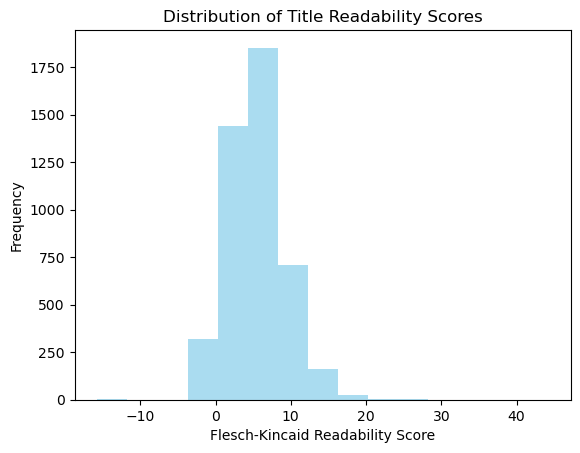

In [92]:
import pandas as pd
import textstat

# Assuming you have a DataFrame named 'df' with a 'title' column
df['title'] = df['title'].astype(str)

# Calculate Flesch-Kincaid readability score for each title
df['readability_score'] = df['title'].apply(lambda title: textstat.flesch_kincaid_grade(title))

# Visualize the distribution of readability scores
import matplotlib.pyplot as plt
plt.hist(df['readability_score'], bins=15, color='skyblue', alpha=0.7)
plt.title('Distribution of Title Readability Scores')
plt.xlabel('Flesch-Kincaid Readability Score')
plt.ylabel('Frequency')
plt.show()

In [60]:
pip install pyphen

Note: you may need to restart the kernel to use updated packages.


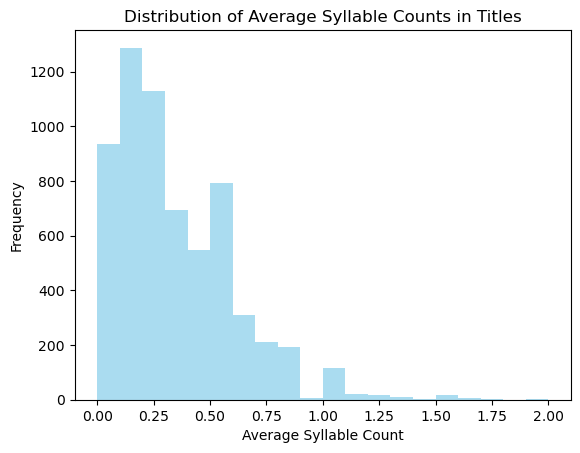

In [61]:
import pandas as pd
import pyphen

# Assuming you have a DataFrame named 'df' with a 'title' column
df['title'] = df['title'].astype(str)

# Create a syllable counter
dic = pyphen.Pyphen(lang='en')

# Calculate average syllable count for each title
df['avg_syllable_count'] = df['title'].apply(lambda title: sum(len(dic.positions(w)) for w in title.split()) / len(title.split()))

# Visualize the distribution of average syllable counts
import matplotlib.pyplot as plt
plt.hist(df['avg_syllable_count'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Average Syllable Counts in Titles')
plt.xlabel('Average Syllable Count')
plt.ylabel('Frequency')
plt.show()


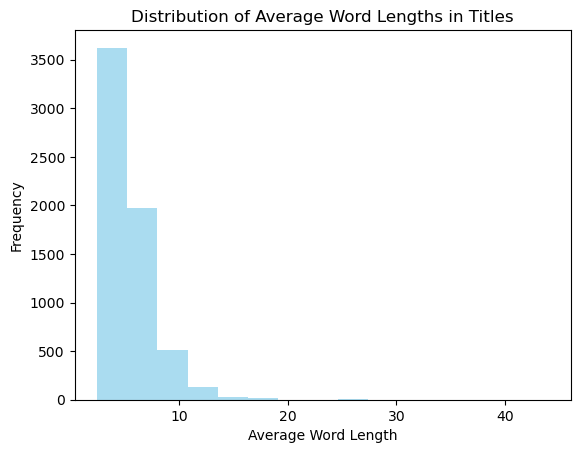

In [62]:
# Calculate average word length for each title
df['avg_word_length'] = df['title'].apply(lambda title: sum(len(word) for word in title.split()) / len(title.split()))

# Visualize the distribution of average word lengths
plt.hist(df['avg_word_length'], bins=15, color='skyblue', alpha=0.7)
plt.title('Distribution of Average Word Lengths in Titles')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.show()

In [63]:
pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/90/f0/0133b684e18932c7bf4075d94819746cee2c0329f2569db526b0fa1df1df/spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd044e6f62a3d317c461f6f0c153c6573ed13025752d779e514000c15dd2/cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.2 from https://files.pythonhosted.org/packages/e4/fc/78cdbdb79f5

In [64]:
import spacy

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

# Define a function to count the number of proper nouns in a title
def count_proper_nouns(title):
    doc = nlp(title)
    return len([token.text for token in doc if token.pos_ == 'PROPN'])

# Calculate the number of proper nouns for each title
df['num_proper_nouns'] = df['title'].apply(count_proper_nouns)

# Visualize the distribution of the number of proper nouns
plt.hist(df['num_proper_nouns'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of the Number of Proper Nouns in Titles')
plt.xlabel('Number of Proper Nouns')
plt.ylabel('Frequency')
plt.show()


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
import pandas as pd
import spacy
from collections import Counter

# Assuming you have a DataFrame named 'df' with a 'title' column
df['title'] = df['title'].astype(str)

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

# Function to extract proper nouns from a title
def extract_proper_nouns(title):
    doc = nlp(title)
    proper_nouns = [token.text for token in doc if token.pos_ == 'PROPN']
    return proper_nouns

# Apply the function to each title and create a new column
df['proper_nouns'] = df['title'].apply(extract_proper_nouns)

# Flatten the list of proper nouns and count occurrences
all_proper_nouns = [noun for nouns in df['proper_nouns'] for noun in nouns]
proper_noun_counts = Counter(all_proper_nouns)

# Display the most common proper nouns
print("Top 10 Most Common Proper Nouns:")
for noun, count in proper_noun_counts.most_common(10):
    print(f"{noun}: {count}")


In [ ]:
import pandas as pd
import spacy
from collections import Counter

# Assuming you have a DataFrame named 'df' with a 'title' column
df['title'] = df['title'].astype(str)

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

# Function to extract proper nouns from a title
def extract_proper_nouns(title):
    doc = nlp(title)
    proper_nouns = [token.text for token in doc if token.pos_ == 'PROPN']
    return proper_nouns

# Apply the function to each title and create a new column
df['proper_nouns'] = df['title'].apply(extract_proper_nouns)

# Flatten the list of proper nouns and count occurrences
all_proper_nouns = [noun for nouns in df['proper_nouns'] for noun in nouns]
proper_noun_counts = Counter(all_proper_nouns)

# Display the most common proper nouns and associated titles
print("Top 10 Most Common Proper Nouns:")
for noun, count in proper_noun_counts.most_common(10):
    print(f"{noun}: {count}")
    titles_with_noun = df[df['proper_nouns'].apply(lambda nouns: noun in nouns)]['title'].tolist()
    print("Titles:")
    for title in titles_with_noun:
        print(f"  - {title}")
    print()


In [ ]:
import pandas as pd
import spacy

# Assuming you have a DataFrame named 'df' with 'title' and 'channel_name' columns
# Make sure to replace 'channel_name' with the actual column name in your DataFrame

df['title'] = df['title'].astype(str)

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

# Function to extract proper nouns from a title
def extract_proper_nouns(title):
    doc = nlp(title)
    proper_nouns = [token.text for token in doc if token.pos_ == 'PROPN']
    return proper_nouns

# Apply the function to each title and create a new column
df['proper_nouns'] = df['title'].apply(extract_proper_nouns)

# Flatten the list of proper nouns and count occurrences
all_proper_nouns = [noun for nouns in df['proper_nouns'] for noun in nouns]
proper_noun_counts = pd.DataFrame.from_dict(Counter(all_proper_nouns), orient='index', columns=['count'])

# Display the most common proper nouns with counts
# print("Top 10 Most Common Proper Nouns:")
# print(proper_noun_counts.sort_values(by='count', ascending=False).head(10))

# Store titles and channel names with proper nouns in a new DataFrame
titles_with_proper_nouns_df = df[['title', 'channelTitle', 'proper_nouns']]

# Display the new DataFrame
#print("\nTitles with Channel Names and Proper Nouns:")
print(titles_with_proper_nouns_df.head())


In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'title', 'viewcount', 'likecount'
df['title'] = df['title'].astype(str)

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each title and create a new column
df['sentiment'] = df['title'].apply(lambda title: sid.polarity_scores(title)['compound'])

df['sentiment_category'] = df['sentiment'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

# Count the number of titles in each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

print(sentiment_counts['positive'])
print(sentiment_counts['negative'])
print(sentiment_counts['neutral'])

# Scatter plot: Sentiment vs. View count
plt.scatter(df['sentiment'], df['viewCount'], alpha=0.5)
plt.title('Sentiment vs. View Count')
plt.xlabel('Sentiment')
plt.ylabel('View Count')
plt.show()

# Scatter plot: Sentiment vs. Like count
plt.scatter(df['sentiment'], df['likeCount'], alpha=0.5)
plt.title('Sentiment vs. Like Count')
plt.xlabel('Sentiment')
plt.ylabel('Like Count')
plt.show()

In [ ]:
import pandas as pd
import textstat

# Assuming you have a DataFrame named 'df' with a 'title' column
df['title'] = df['title'].astype(str)

# Calculate Flesch-Kincaid readability score for each title
df['readability_score'] = df['title'].apply(lambda title: textstat.flesch_kincaid_grade(title))

# Visualize the distribution of readability scores
import matplotlib.pyplot as plt
plt.hist(df['readability_score'], bins=10, color='skyblue', alpha=0.7)
plt.title('Distribution of Title Readability Scores')
plt.xlabel('Flesch-Kincaid Readability Score')
plt.ylabel('Frequency')
plt.show()